In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import preprocessing
from sklearn import linear_model

In [2]:
df = pd.read_csv("data/yerevan_houses.csv")

In [3]:
df = df.drop(["url","Unnamed: 0","region","Unnamed: 0.1"], axis = "columns")

In [4]:
df.head()

,price,condition,district,max_floor,street,num_rooms,area,num_bathrooms,building_type,floor,ceiling_height
0,75000.0,good,Center,4,Buzand St,3,105.0,1,stone,4,3.2
1,110000.0,newly repaired,Davtashen,15,Mikoyan St,4,114.0,2,monolit,9,3.2
2,57000.0,newly repaired,Shengavit,5,Arshakunyats Ave,2,82.0,1,stone,2,3.2
3,49000.0,newly repaired,Qanaqer-Zeytun,9,Gogol St,1,78.0,1,other,9,2.8
4,125000.0,newly repaired,Arabkir,10,A. Avetisyan St,3,140.0,1,panel,10,3.0


In [5]:
df.describe()

,price,max_floor,num_rooms,area,num_bathrooms,floor,ceiling_height
count,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000
mean,86347.996135,8.749324,2.694240,81.568226,1.165249,5.181871,2.896096
std,52500.892492,4.173408,0.829372,24.902204,0.403855,3.425828,0.144585
min,18500.000000,1.000000,1.000000,27.000000,1.000000,0.000000,2.600000
25%,50000.000000,5.000000,2.000000,64.250000,1.000000,3.000000,2.800000
50%,70000.000000,9.000000,3.000000,80.000000,1.000000,4.000000,2.800000
75%,109000.000000,12.000000,3.000000,98.000000,1.000000,7.000000,3.000000
max,550000.000000,24.000000,6.000000,149.000000,4.000000,22.000000,3.800000


<AxesSubplot:>

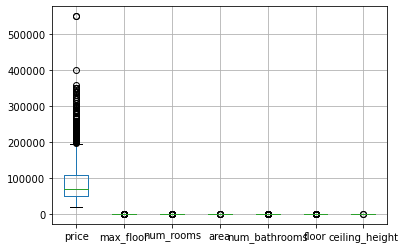

In [6]:
df.boxplot()

In [7]:
X = df.drop(["price"], axis = "columns")
X.head(3)

,condition,district,max_floor,street,num_rooms,area,num_bathrooms,building_type,floor,ceiling_height
0,good,Center,4,Buzand St,3,105.0,1,stone,4,3.2
1,newly repaired,Davtashen,15,Mikoyan St,4,114.0,2,monolit,9,3.2
2,newly repaired,Shengavit,5,Arshakunyats Ave,2,82.0,1,stone,2,3.2


In [8]:
Y = df["price"]

In [9]:
encoder = preprocessing.OneHotEncoder(sparse = False, handle_unknown = 'ignore').fit(
    X[["condition","max_floor","street","building_type","ceiling_height","floor","num_bathrooms","num_rooms",]]
)

In [10]:
encoded = pd.DataFrame(encoder.transform(X[["condition","max_floor","street","building_type","ceiling_height","floor","num_bathrooms","num_rooms",]]
))

In [11]:
encoded.head()

,0,1,2,3,4,5,6,7,8,9,...,401,402,403,404,405,406,407,408,409,410
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [12]:
encoded.shape

(5174, 411)

In [13]:
X = pd.concat([X["area"],encoded],axis = 1)

In [14]:
X.head()

,area,0,1,2,3,4,5,6,7,8,...,401,402,403,404,405,406,407,408,409,410
0,105.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,114.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,82.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,78.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,140.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [15]:
Y = np.log(Y)

In [16]:
X_train, X_test, y_train,y_test = train_test_split(X,Y,test_size = 0.2, random_state = 37)

## Ridge Regression 

In [17]:
regr = linear_model.RidgeCV()
regr.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]))

In [18]:
def print_errors(y_pred, y):
    print('Mean absolute error: %.2f'
        % mean_absolute_error(y, y_pred))
    print('Mean squared error: %.2f'
        % mean_squared_error(y, y_pred))
    print('Root mean squared error: %.2f'
        % np.sqrt(mean_squared_error(y, y_pred)))
    print('R-squared: %.2f'
        % r2_score(y, y_pred))

In [19]:
y_pred = regr.predict(X_test)

In [20]:
print_errors(y_pred,y_test)

Mean absolute error: 0.16
Mean squared error: 0.04
Root mean squared error: 0.21
R-squared: 0.84


## Gradient Boosting Regressor

In [21]:
boosting = GradientBoostingRegressor(random_state = 42)

In [22]:
param_grid = {
    'max_depth': [70,80,90,100,110],
    'max_features':[2,3],
    'min_samples_leaf': [3,4,5],
    'min_samples_split': [8,10,12],
    'n_estimators': [100,200,300,500]    
}

In [23]:
grid_cv = GridSearchCV(estimator = boosting,
                       param_grid = param_grid, 
                       cv = 5, 
                       n_jobs = -1)

In [25]:
grid_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [70, 80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 500]})

In [26]:
model = grid_cv.best_estimator_

In [27]:
model

GradientBoostingRegressor(max_depth=70, max_features=3, min_samples_leaf=3,
                          min_samples_split=8, n_estimators=500,
                          random_state=42)

In [28]:
yPred = model.predict(X_test)

In [29]:
print_errors(yPred,y_test)

Mean absolute error: 0.16
Mean squared error: 0.04
Root mean squared error: 0.21
R-squared: 0.83
